# External Weather Information

## Motivation

External wind measurements can be very helpful when analyzing races or looking for trends.  It can also be used to validate True Wind Direction (TWD) as estimated on the boat (which is very tricky).

## Overview

We do most of our sailing in the Puget sound, and the weather station that most accurately captures winds is the [West Point Station](https://www.ndbc.noaa.gov/station_page.php?station=wpow1).  Nearby buoys appear to be poorly maintained (it's tough to maintain a floating buoy) and the other stations are tucked in coves.  The West Point buoy is at the end of a point almost at the center of the sound just north of Seattle.

You can access wind and meteorological data from several pages linked from the portal above (more on this below).  The wind speed and direction are available every **10 mins** (which is awesome).  Other data like wind gust, temp and pressure are available hourly.

Similar data is available from NOAA by other means.  The benefits are that the format is standardized; the disadvantage is that the data is **hourly**.  Details are included here for reference.

Search page.

    https://www.ncei.noaa.gov/access/search/data-search/global-hourly?startDate=%5B%222018-12-01T00:00:00%22%5D&endDate=%5B%222019-06-01T23:59:59%22%5D&stations=%5B%2299435099999%22%5D

This is the file for West Point in Seattle.

    https://www.ncei.noaa.gov/data/global-hourly/access/2019/99435099999.csv

Helpful doc here:

    https://www.visualcrossing.com/blog/how-we-process-integrated-surface-database-historical-weather-data

For example:

> The value of 'WND' is 170,1,N,0015,1. WND represents wind measurements of the form
direction,direction quality,observation type, speed, speed quality. Again the speed is
multipled by 10 to avoid using decimal points in the file format. Therefore this record
indicates that the wind direction was 170 degrees with a speed of 1.5 meters per second
(approximately 3.4mph or 5.4 kph).


In [23]:
# notebook 
%matplotlib notebook
import matplotlib.pyplot as plt

In [38]:
import pandas as pd
import numpy as np

In [56]:
# notebook 
import io

# The that can be downloaded looks like this.  (https://www.ndbc.noaa.gov/data/realtime2/WPOW1.cwind)

def example():
    return io.StringIO("""
#YY  MM DD hh mm WDIR WSPD GDR GST GTIME
#yr  mo dy hr mn degT m/s degT m/s hhmm
2020 04 20 23 00 181  1.0 180  2.1 2218
2020 04 20 22 50 169  1.0 999 99.0 9999
2020 04 20 22 40 173  1.0 999 99.0 9999
2020 04 20 22 30 166  1.5 999 99.0 9999
2020 04 20 22 20 175  1.5 999 99.0 9999
""")

# Conveniently we can use Pandas to read this data... though it will take a bit of work
# to make it useful.
wind_raw = pd.read_csv(example(), delim_whitespace=True)
wind_raw

,#YY,MM,DD,hh,mm,WDIR,WSPD,GDR,GST,GTIME
0,#yr,mo,dy,hr,mn,degT,m/s,degT,m/s,hhmm
1,2020,04,20,23,00,181,1.0,180,2.1,2218
2,2020,04,20,22,50,169,1.0,999,99.0,9999
3,2020,04,20,22,40,173,1.0,999,99.0,9999
4,2020,04,20,22,30,166,1.5,999,99.0,9999
5,2020,04,20,22,20,175,1.5,999,99.0,9999


In [53]:
def read_conditions(url):
    """
    Conditions data is:
    
    - space delimited
    - funny short column names
    - second row contains types and not data
    - missing values are 999, 99.0, and 9999 (so gust data is infrequent)

    Other than that it is self explanatory!   (See notebook for additonal info.)
    """
    raw = pd.read_csv(url, delim_whitespace=True)
    rename = {'#YY':'year', 'MM':"month", 'DD':'day', 'hh':'hour', 'mm':'minute'}

    renamed = raw.rename(columns=rename)
    renamed = renamed.rename(columns=lambda s: s.lower())

    units = renamed.iloc[0]

    # The columns are objects (most likely because of the units row)
    for col in renamed.columns:
        renamed[col] = pd.to_numeric(renamed[col])

    renamed['datetime'] = pd.to_datetime(wind_45["year month day hour minute".split()])
    renamed.datetime = renamed.datetime.dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
    
    return renamed, units

In [57]:
read_conditions(example())

ValueError: Unable to parse string "#yr" at position 0

<IPython.core.display.Javascript object>


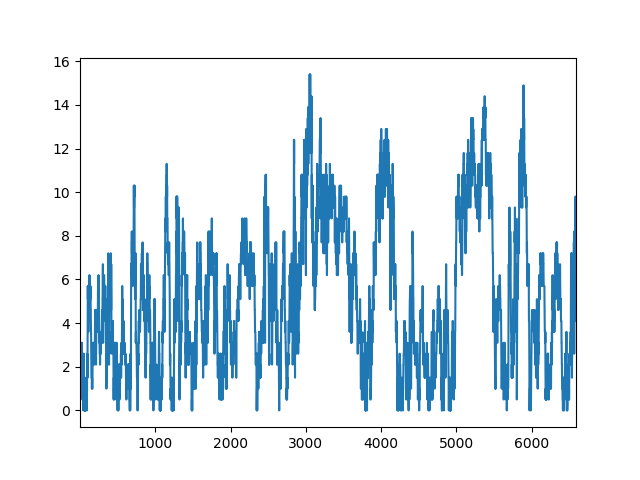

In [24]:
plt.figure()
wind_45.WSPD.plot()

In [14]:
wind_45['MM'].unique()

array(['04', '03'], dtype=object)

In [15]:
wind_45['MM'].infer_objects()

2       04
3       04
4       04
5       04
6       04
        ..
6585    03
6586    03
6587    03
6588    03
6589    03
Name: MM, Length: 6588, dtype: object

In [ ]:
WPOW1_45 = 'https://www.ndbc.noaa.gov/data/realtime2/WPOW1.cwind'
